In [17]:
import pandas as pd
import numpy as np
import os
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

In [2]:
data = pd.read_csv('National_Stock_Exchange_of_India_Ltd.csv')
data.head()

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,ADANIPORTS,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901,384.4,79.22,-4.65
1,ASIANPAINT,"3,101.00","3,167.35","3,091.00","3,138.00",-6.25,-0.20,10.29,322.53,"3,505.00","2,117.15",45.66,5.66
2,AXISBANK,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.9,568.4,10.19,-21.49
3,BAJAJ-AUTO,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,"4,361.40","3,041.00",9.30,-12.05
4,BAJAJFINSV,"17,200.00","17,237.20","16,610.00","16,684.00",-684.85,-3.94,3.42,576.79,"19,325.00","8,273.70",91.38,-9.10


In [38]:
X, y = make_regression(
    n_samples=1000,
    n_features=1,
    n_informative=5,
    noise=0.1,  # Some noise to make the data more realistic
    random_state=0
)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
feature_names = [f"feature {i}" for i in range(X.shape[1])]
# Step 3: Initialize and train a Random Forest Regressor
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

RandomForestClassifier(random_state=0)

In [39]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

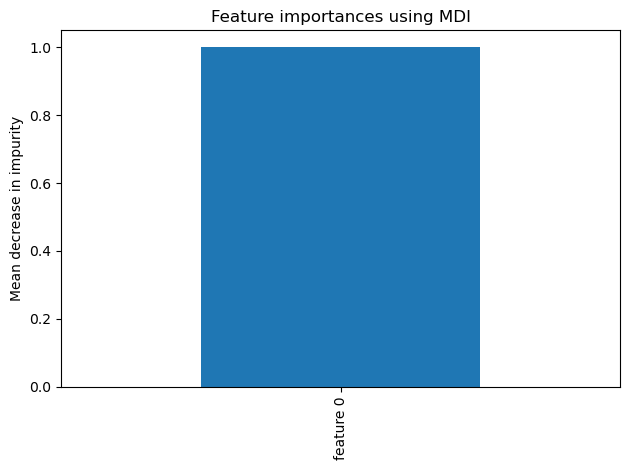

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
forest_regressor = RandomForestRegressor(random_state=0)

# Fit the model on the training data
forest_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = forest_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Feature importance
importances = forest_regressor.feature_importances_
feature_names = [f"feature {i}" for i in range(X.shape[1])]

# Create a DataFrame for feature importance and sort it
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance:")
print(feature_importance_df)




Mean Squared Error: 0.35
R-squared: 1.00
Feature Importance:
     Feature  Importance
0  feature 0         1.0


In [42]:
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual LTP: {actual:.2f}, Predicted LTP: {predicted:.2f}")

Actual LTP: 41.13, Predicted LTP: 40.75
Actual LTP: 174.04, Predicted LTP: 175.18
Actual LTP: -133.02, Predicted LTP: -133.29
Actual LTP: 79.65, Predicted LTP: 79.68
Actual LTP: 31.00, Predicted LTP: 31.22
Actual LTP: -131.58, Predicted LTP: -132.10
Actual LTP: 38.80, Predicted LTP: 38.66
Actual LTP: 0.85, Predicted LTP: 0.80
Actual LTP: 2.07, Predicted LTP: 1.73
Actual LTP: -7.37, Predicted LTP: -7.37
Actual LTP: -26.35, Predicted LTP: -26.23
Actual LTP: 7.29, Predicted LTP: 7.59
Actual LTP: -38.45, Predicted LTP: -38.53
Actual LTP: -30.58, Predicted LTP: -30.41
Actual LTP: 12.87, Predicted LTP: 12.96
Actual LTP: -0.94, Predicted LTP: -1.22
Actual LTP: 102.27, Predicted LTP: 101.13
Actual LTP: -40.78, Predicted LTP: -40.86
Actual LTP: -84.63, Predicted LTP: -84.93
Actual LTP: 20.71, Predicted LTP: 20.73
Actual LTP: -19.85, Predicted LTP: -19.79
Actual LTP: 15.96, Predicted LTP: 16.00
Actual LTP: -96.85, Predicted LTP: -96.86
Actual LTP: 88.67, Predicted LTP: 88.68
Actual LTP: 35.09, P

In [43]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform cross-validation (5-fold)
cv_scores = cross_val_score(forest, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score = -np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Cross-validated MSE: {mean_cv_score} ± {std_cv_score}")

Cross-validated MSE: 1.4764306025330594 ± 0.8211227025005394
